In [1]:
## dependencies

In [2]:
#pip install country_converter --upgrade
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date 
from datetime import datetime
import hvplot.pandas


In [3]:
#Load the CSV file created in Part 1 into a Pandas DataFrame
hotel_df = pd.read_csv("Resources/hotel_bookings.csv")
country_df = pd.read_csv("Resources/countries_codes_and_coordinates.csv")

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              262 non-null    object
 1   Alpha-2 code         262 non-null    object
 2   Alpha-3 code         262 non-null    object
 3   Numeric code         262 non-null    object
 4   Latitude (average)   262 non-null    object
 5   Longitude (average)  262 non-null    object
dtypes: object(6)
memory usage: 12.4+ KB


In [5]:
# Define the cleaning function
clean_function = lambda x: x.replace('"', '').strip() if isinstance(x, str) else x

# Apply the cleaning function to each column (Series) in the DataFrame
country_clean_df = country_df.copy()
for col in country_clean_df.columns:
    country_clean_df[col] = country_clean_df[col].map(clean_function)

# Dropping columns 'Alpha-2 code' and 'Numeric code'
country_clean_df = country_clean_df.drop(['Alpha-2 code', 'Numeric code'], axis=1)

# Renaming column 'Country' to 'Country Name'
country_clean_df.rename(columns={'Country': 'Country Name'}, inplace=True)

# Show the first few rows of the cleaned DataFrame
country_clean_df.head()

,Country Name,Alpha-3 code,Latitude (average),Longitude (average)
0,Afghanistan,AFG,33,65
1,Åland Islands,ALA,60.116667,19.9
2,Albania,ALB,41,20
3,Algeria,DZA,28,3
4,American Samoa,ASM,-14.3333,-170


Merge the files

In [6]:
#  hotel_country_df = pd.merge(hotel_df, country_clean_df, how='left', left_on='country', right_on='Alpha-3 code')
hotel_country_df = pd.merge(hotel_df, country_clean_df, how='left', 
                            left_on='country', right_on='Alpha-3 code', 
                            suffixes=('', '_from_country_clean'))

In [7]:
hotel_country_df = hotel_country_df.dropna(subset=['Country Name'])
hotel_country_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 118444 entries, 0 to 120213
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           118444 non-null  int64  
 1   hotel                           118444 non-null  object 
 2   is_canceled                     118444 non-null  int64  
 3   lead_time                       118444 non-null  int64  
 4   arrival_date_year               118444 non-null  int64  
 5   arrival_date_month              118444 non-null  object 
 6   arrival_date_week_number        118444 non-null  int64  
 7   arrival_date_day_of_month       118444 non-null  int64  
 8   stays_in_weekend_nights         118444 non-null  int64  
 9   stays_in_week_nights            118444 non-null  int64  
 10  adults                          118444 non-null  int64  
 11  children                        118440 non-null  float64
 12  babies               

Create 3 columns
arrival_date - combine columns to get a date
nights_spent - add the stays in weekend + stays in week
amount_spent - amount spent per stay = nights_ spent * average day rate

In [8]:
hotel_country_df['arrival_date'] = pd.to_datetime(hotel_country_df['arrival_date_year'].astype(str) + '-' +
                                                  hotel_country_df['arrival_date_month'] + '-' +
                                                  hotel_country_df['arrival_date_day_of_month'].astype(str))

In [9]:
hotel_country_df['nights_spent'] = (hotel_country_df['stays_in_weekend_nights'] + hotel_country_df['stays_in_week_nights'])

In [10]:
hotel_country_df['amount_spent'] = (hotel_country_df['nights_spent'] * hotel_country_df['adr'])

In [11]:
# def convert_date(original_date):
#     # Split the date string into year, month, and day components
#     year, month, day = original_date.split("-")
    
#     # Make the corrections based on the pattern in the problem statement
#     # In the pattern, the original year signifies the day, the month is correct, and the day signifies the last two digits of the year
#     corrected_date = f"20{day}-{month}-{year[-2:]}"
    
#     # Convert to datetime
#     corrected_date = pd.to_datetime(corrected_date)
    
#     return corrected_date

# # Apply the function and add a new column
# hotel_country_df['corrected_reservation_date'] = hotel_country_df['reservation_status_date'].apply(convert_date)




In [12]:
# Check the DataFrame with the new column
hotel_country_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,total_of_special_requests,reservation_status,reservation_status_date,Country Name,Alpha-3 code,Latitude (average),Longitude (average),arrival_date,nights_spent,amount_spent
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Check-Out,01-07-15,Portugal,PRT,39.5,-8,2015-07-01,0,0.00
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Check-Out,01-07-15,Portugal,PRT,39.5,-8,2015-07-01,0,0.00
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Check-Out,02-07-15,United Kingdom,GBR,54,-2,2015-07-01,1,75.00
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Check-Out,02-07-15,United Kingdom,GBR,54,-2,2015-07-01,1,75.00
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,1,Check-Out,03-07-15,United Kingdom,GBR,54,-2,2015-07-01,2,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120209,119385,City Hotel,0,23,2017,August,35,30,2,5,...,0,Check-Out,06-09-17,Belgium,BEL,50.8333,4,2017-08-30,7,672.98
120210,119386,City Hotel,0,102,2017,August,35,31,2,5,...,2,Check-Out,07-09-17,France,FRA,46,2,2017-08-31,7,1578.01
120211,119387,City Hotel,0,34,2017,August,35,31,2,5,...,4,Check-Out,07-09-17,Germany,DEU,51,9,2017-08-31,7,1103.97
120212,119388,City Hotel,0,109,2017,August,35,31,2,5,...,0,Check-Out,07-09-17,United Kingdom,GBR,54,-2,2017-08-31,7,730.80


In [13]:
hotel_country_df.to_csv('hotel_country_data.csv')

In [14]:
# Check the DataFrame with the new column
hotel_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118444 entries, 0 to 120213
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           118444 non-null  int64         
 1   hotel                           118444 non-null  object        
 2   is_canceled                     118444 non-null  int64         
 3   lead_time                       118444 non-null  int64         
 4   arrival_date_year               118444 non-null  int64         
 5   arrival_date_month              118444 non-null  object        
 6   arrival_date_week_number        118444 non-null  int64         
 7   arrival_date_day_of_month       118444 non-null  int64         
 8   stays_in_weekend_nights         118444 non-null  int64         
 9   stays_in_week_nights            118444 non-null  int64         
 10  adults                          118444 non-null  int64       

Euros spent per stay from July 1 2015 to August 31 2017

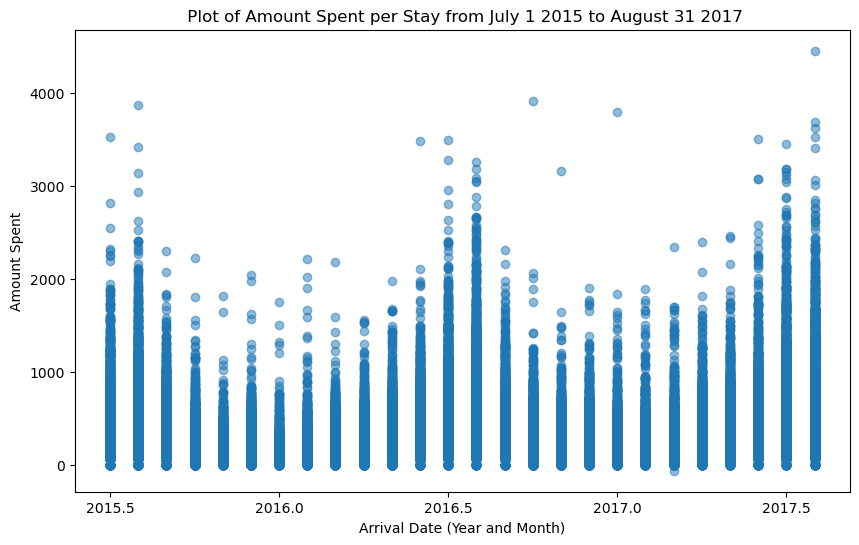

In [15]:
# First filter for check-outs and Resort Hotel only
filtered_df = hotel_country_df[(hotel_country_df['reservation_status'] == 'Check-Out')]

# Instead of creating a new DataFrame, create a copy explicitly to avoid SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Since 'arrival_date_month' is a categorical variable, it must be converted into a numeric form
months_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
filtered_df.loc[:, 'arrival_date_month_numeric'] = filtered_df['arrival_date_month'].map(months_mapping)

# Creating a new column 'arrival_date_numeric' by adding year as thousands plus the month as a fractional year
filtered_df.loc[:, 'arrival_date_numeric'] = filtered_df['arrival_date_year'] + \
                                             (filtered_df['arrival_date_month_numeric'] - 1) / 12

# Perform the regression analysis with 'amount_spent' as dependent variable
# and 'arrival_date_numeric' as independent variable
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['arrival_date_numeric'],
                                                          filtered_df['amount_spent'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['arrival_date_numeric'], filtered_df['amount_spent'], alpha=0.5)



plt.title(" Plot of Amount Spent per Stay from July 1 2015 to August 31 2017")
plt.xlabel("Arrival Date (Year and Month)")
plt.ylabel("Amount Spent")
plt.show()

Average Daily Rate (ADR) vs. Week of the Year

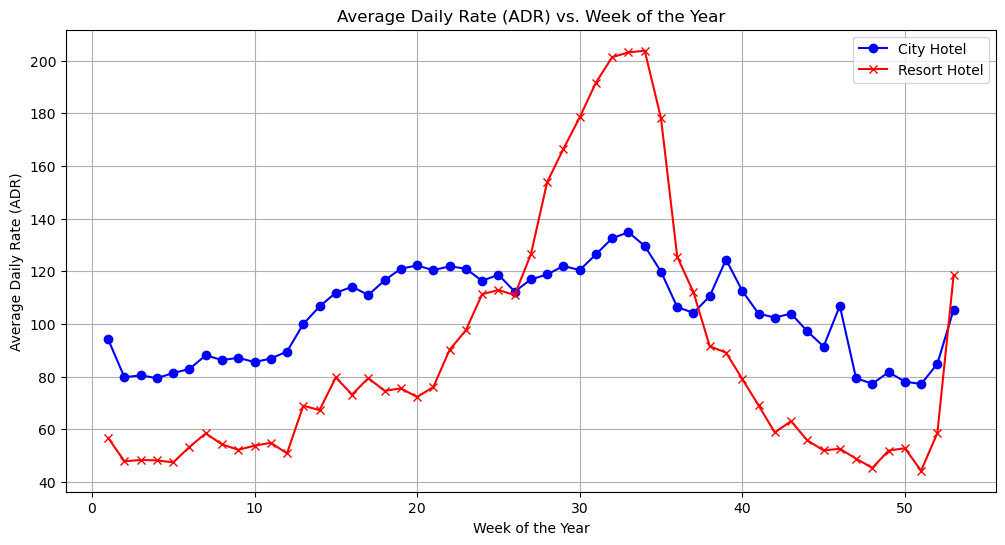

In [16]:
start_date = datetime(2015, 9, 1)
end_date = datetime(2017, 8, 31)


# Create the plot
plt.figure(figsize=(12, 6))# Filter the main DataFrame for check-outs only and make a copy to avoid SettingWithCopyWarning
check_outs_df = hotel_country_df[
    (hotel_country_df['reservation_status'] == 'Check-Out') &
    (hotel_country_df['arrival_date'] >= start_date) &
    (hotel_country_df['arrival_date'] <= end_date)
].copy()

# Proceed with filtering for each hotel type
# Filter DataFrame for City Hotel and calculate the mean ADR per week
city_hotel_data = check_outs_df[check_outs_df['hotel'] == 'City Hotel']
city_hotel_weekly_adr = city_hotel_data.groupby('arrival_date_week_number')['adr'].mean()

# Filter DataFrame for Resort Hotel and calculate the mean ADR per week
resort_hotel_data = check_outs_df[check_outs_df['hotel'] == 'Resort Hotel']
resort_hotel_weekly_adr = resort_hotel_data.groupby('arrival_date_week_number')['adr'].mean()


# Plot City Hotel in blue
plt.plot(city_hotel_weekly_adr.index, city_hotel_weekly_adr.values, label='City Hotel', color='blue', marker='o')

# Plot Resort Hotel in red
plt.plot(resort_hotel_weekly_adr.index, resort_hotel_weekly_adr.values, label='Resort Hotel', color='red', marker='x')

# Add titles and labels
plt.title('Average Daily Rate (ADR) vs. Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()





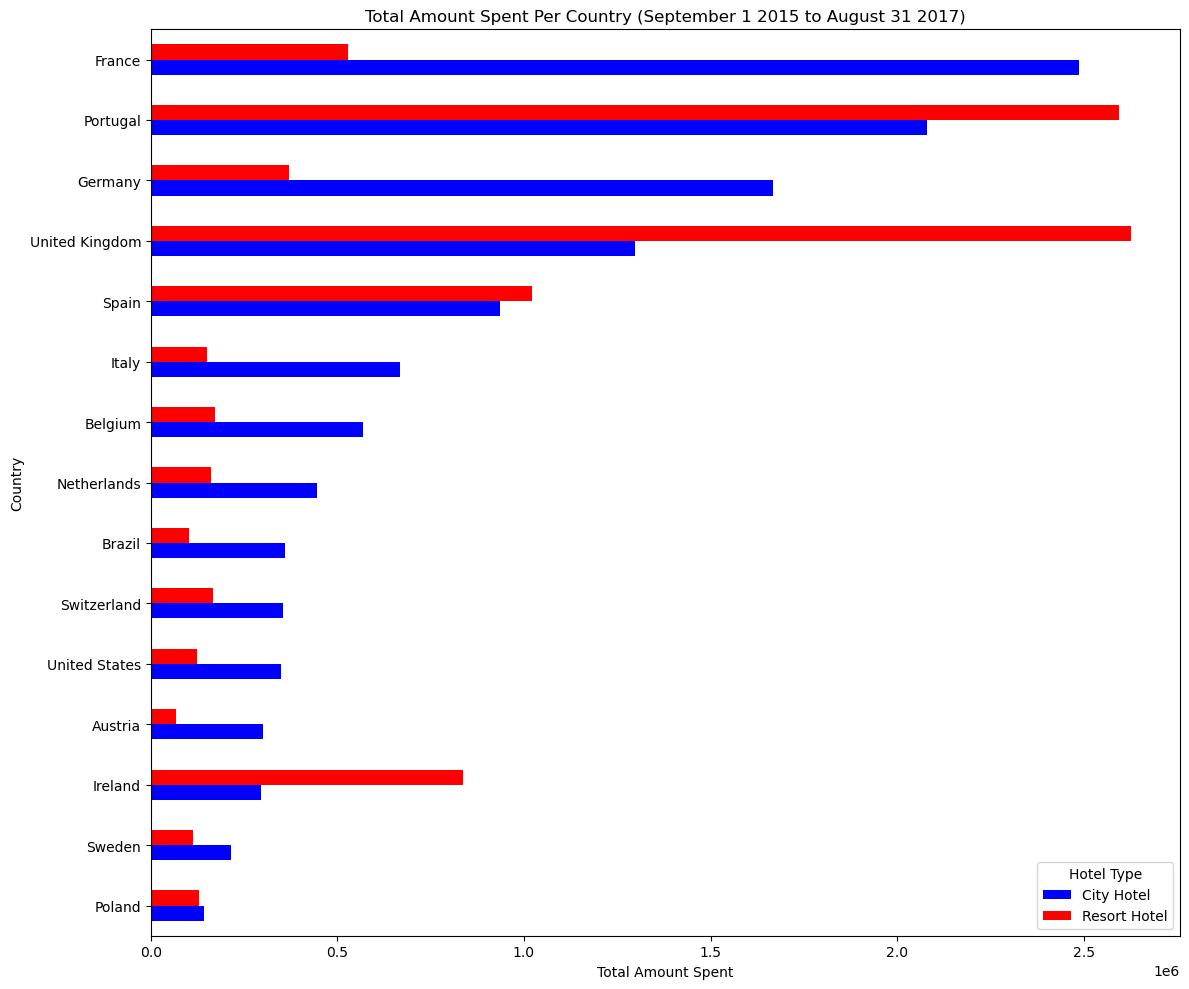

In [17]:
start_date = datetime(2015, 9, 1)
end_date = datetime(2017, 8, 31)

check_outs_df = hotel_country_df[
    (hotel_country_df['reservation_status'] == 'Check-Out') &
    (hotel_country_df['arrival_date'] >= start_date) &
    (hotel_country_df['arrival_date'] <= end_date)
].copy()


# Group by 'country' and 'hotel' and sum the 'amount_spent', then sort by the sum
grouped_data = check_outs_df.groupby(['Country Name', 'hotel'])['amount_spent'].sum().reset_index()

# Get the top 25 countries by amount spent
top_countries = grouped_data.groupby('Country Name')['amount_spent'].sum().nlargest(15).index

# Filter the grouped data for the top countries
top_grouped_data = grouped_data[grouped_data['Country Name'].isin(top_countries)]

# Pivot data to have hotels as columns and countries as rows
pivot_data = top_grouped_data.pivot(index='Country Name', columns='hotel', values='amount_spent')

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Horizontal bar plot, City Hotel in blue, Resort Hotel in red
pivot_data.sort_values(by='City Hotel', ascending=True).plot(kind='barh', color={'City Hotel': 'blue', 'Resort Hotel': 'red'}, ax=ax)

# Add titles and labels
plt.title('Total Amount Spent Per Country (September 1 2015 to August 31 2017)')
plt.xlabel('Total Amount Spent')
plt.ylabel('Country')
plt.legend(title='Hotel Type')
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# Filtering the DataFrame for check-outs only
check_outs_df = hotel_country_df.loc[hotel_country_df['reservation_status'] == 'Check-Out'].copy()

# Calculate weekend spend and weekday spend
check_outs_df.loc[:, 'weekend_spend'] = check_outs_df['adr'] * check_outs_df['stays_in_weekend_nights']
check_outs_df.loc[:, 'weekday_spend'] = check_outs_df['adr'] * check_outs_df['stays_in_week_nights']

# Summing up weekend and weekday spend for both hotel types
summary_df = check_outs_df.groupby('hotel')[['weekend_spend', 'weekday_spend']].sum()

# Plotting the bar chart
summary_df_plot = summary_df.hvplot.bar(rot=45, width=500, height=400, title="Total Spend for Resort and City Hotels")

# Render the plot. Note: If you are running this in a Jupyter notebook, you might need to use 'hvplot.show(summary_df_plot)'.
summary_df_plot

:Bars   [hotel,Variable]   (value)

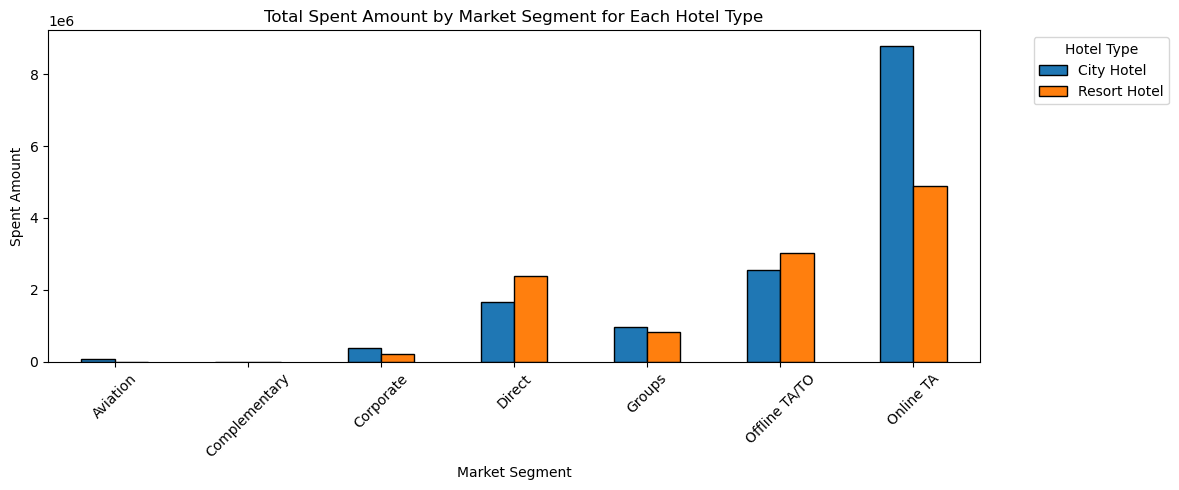

In [19]:
# Filter the DataFrame for rows where 'reservation_status' is 'Check-Out'
filtered_df = hotel_country_df.loc[
    (hotel_country_df['reservation_status'] == 'Check-Out')
].copy()

# Group by 'market_segment' and 'hotel', then sum up the 'amount_spent'
segment_group = filtered_df.groupby(['market_segment', 'hotel'])['amount_spent'].sum().unstack(fill_value=0)

# Plot the histogram for each market segment with both 'City Hotel' and 'Resort Hotel'
segment_group.plot(kind='bar', figsize=(10, 5), edgecolor='black')
plt.xlabel('Market Segment')
plt.ylabel('Spent Amount')
plt.title('Total Spent Amount by Market Segment for Each Hotel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust the layout for better fit
plt.legend(title='Hotel Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

In [20]:
# Filter the DataFrame for rows where 'reservation_status' is 'Check-Out'
filtered_df = hotel_country_df.loc[
    hotel_country_df['reservation_status'] == 'Check-Out'
].copy()

# Convert 'amount_spent' to millions of euros
filtered_df['amount_spent_millions'] = filtered_df['amount_spent'] / 1_000_000

# Group by 'market_segment' then 'hotel', and sum up the 'amount_spent_millions'
segment_group = filtered_df.groupby(['market_segment', 'hotel'])['amount_spent_millions'].sum().reset_index()

# Use hvPlot to plot the bar chart
segment_group_plot = segment_group.hvplot.bar(
    x='market_segment',
    y='amount_spent_millions',
    by='hotel',
    height=400,
    width=800,
    xlabel="Market Segment",
    ylabel="Spent Amount (in millions of Euros)",
    title="Total Spent Amount by Hotels within Each Market Segment",
    rot=45
)

# Render the plot.
segment_group_plot.opts(invert_axes=False)

:Bars   [market_segment,hotel]   (amount_spent_millions)

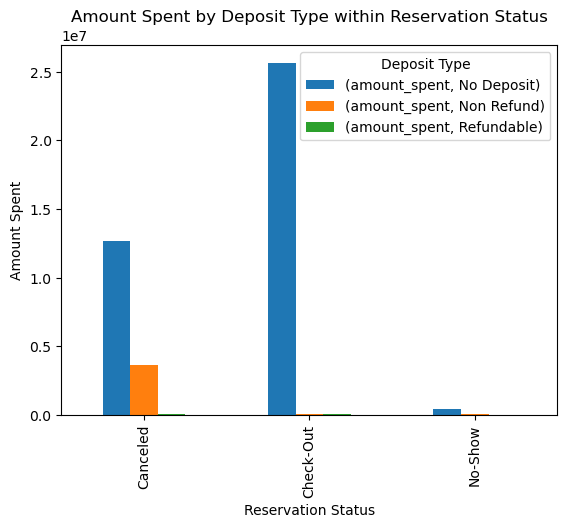

In [55]:
# Filter the data to include only the required columns
filtered_df = hotel_country_df[['amount_spent', 'reservation_status', 'deposit_type']]

# Group the data by reservation_status and deposit_type
grouped_df = filtered_df.groupby(['reservation_status', 'deposit_type']).sum()

# Pivot the data to create a new DataFrame with reservation_status as index and deposit_type as columns
pivoted_df = grouped_df.unstack()

# Create a histogram for each reservation status
ax = pivoted_df.plot(kind='bar', stacked=False)

# Set the title and labels for the plot
plt.title('Amount Spent by Deposit Type within Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Amount Spent')

# Add a legend
plt.legend(title='Deposit Type')

# Show the plot
plt.show()

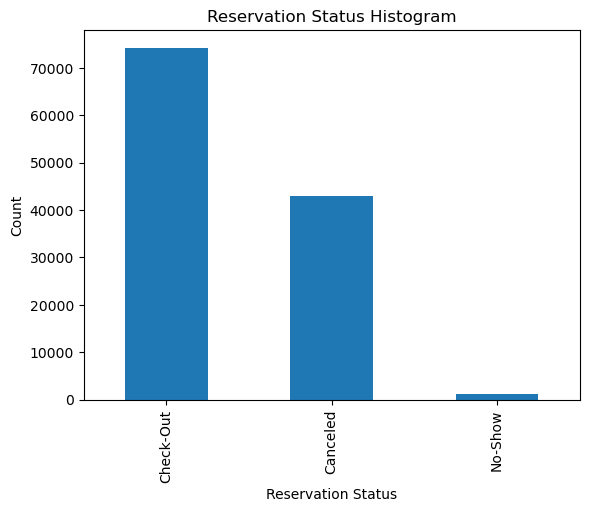

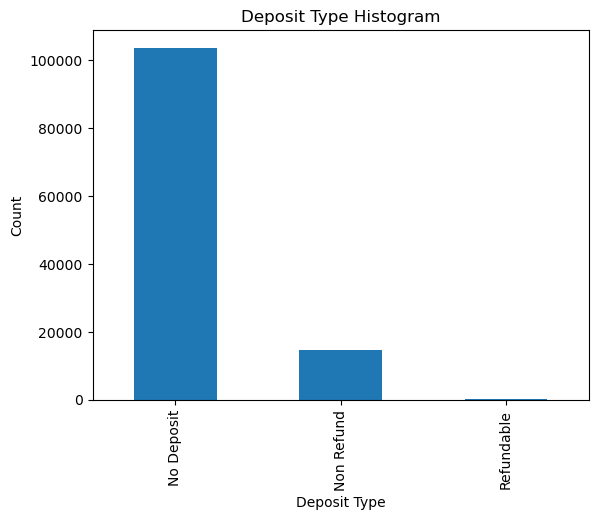

In [40]:
hotel_country_df["reservation_status"].value_counts().plot.bar()
plt.xlabel("Reservation Status")
plt.ylabel("Count")
plt.title("Reservation Status Histogram")
plt.show()

hotel_country_df["deposit_type"].value_counts().plot.bar()
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.title("Deposit Type Histogram")
plt.show()

In [21]:
# Filter the DataFrame for rows where 'reservation_status' is 'Check-Out'
filtered_df = hotel_country_df.loc[hotel_country_df['reservation_status'] == 'Check-Out'].copy()

# Group by 'market_segment' and 'hotel', then sum up the 'amount_spent'
segment_group = filtered_df.groupby(['market_segment', 'hotel'])['amount_spent'].sum().reset_index()

# Use hvplot to create a bar chart where hotels are nested within market segments
segment_group_plot = segment_group.hvplot.bar(
    x='market_segment',
    y='amount_spent',
    by='hotel',
    rot=45,
    height=400,
    width=700,
    xlabel='Market Segment',
    ylabel='Spent Amount',
    title='Total Spent Amount within Market Segment by Hotel Type'
)

# Render the plot
segment_group_plot

:Bars   [market_segment,hotel]   (amount_spent)

In [22]:
# Filter the DataFrame for rows where 'reservation_status' is 'Check-Out'
filtered_df = hotel_country_df.loc[
    hotel_country_df['reservation_status'] == 'Check-Out'
].copy()

# Convert 'amount_spent' to millions of euros
filtered_df['amount_spent_millions'] = filtered_df['amount_spent'] / 1_000_000

# Group by 'market_segment' then 'hotel', and sum up the 'amount_spent_millions'
segment_group = filtered_df.groupby(['market_segment', 'hotel'])['amount_spent_millions'].sum().reset_index()

# Use hvPlot to plot the bar chart
segment_group_plot = segment_group.hvplot.bar(
    x='market_segment',
    y='amount_spent_millions',
    by='hotel',
    height=500,
    width=900,
    xlabel="Market Segment",
    ylabel="Spent Amount (in millions of Euros)",
    title="Total Spent Amount by Hotels within Each Market Segment",
    
)

# Render the plot.
segment_group_plot.opts(invert_axes=False)

:Bars   [market_segment,hotel]   (amount_spent_millions)

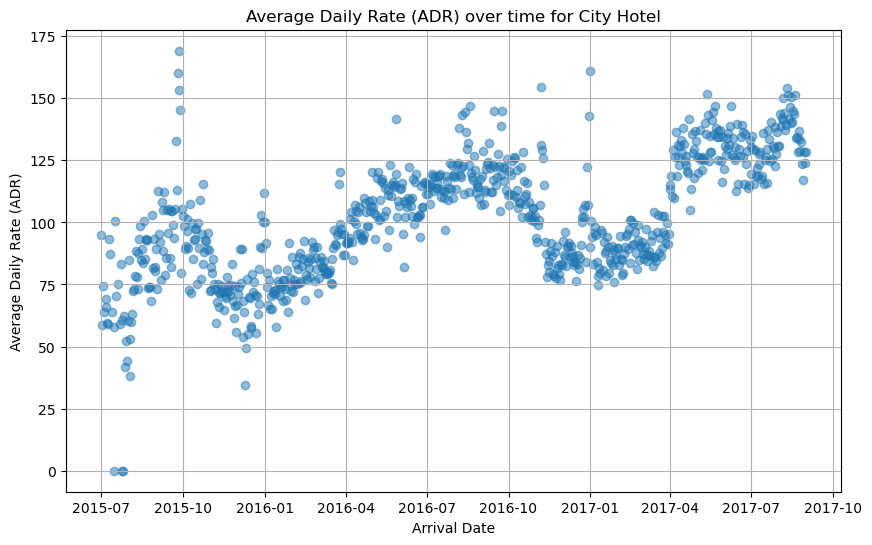

In [23]:


check_outs_df = hotel_country_df[hotel_country_df['reservation_status'] == 'Check-Out'].copy()

# Filter DataFrame for City Hotel
city_hotel_data = check_outs_df[check_outs_df['hotel'] == 'City Hotel']

# Group by arrival_date and calculate mean adr
average_adr_by_date = city_hotel_data.groupby('arrival_date')['adr'].mean().reset_index()

# Make a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_adr_by_date['arrival_date'], average_adr_by_date['adr'], alpha=0.5)
plt.title('Average Daily Rate (ADR) over time for City Hotel')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()


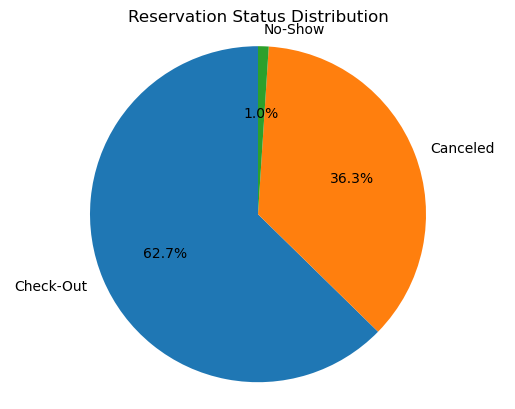

In [24]:


# Count the occurrences of each reservation status
status_counts = hotel_country_df['reservation_status'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Reservation Status Distribution')

# Show the pie chart
plt.show()


The R-squared value is: 0.39


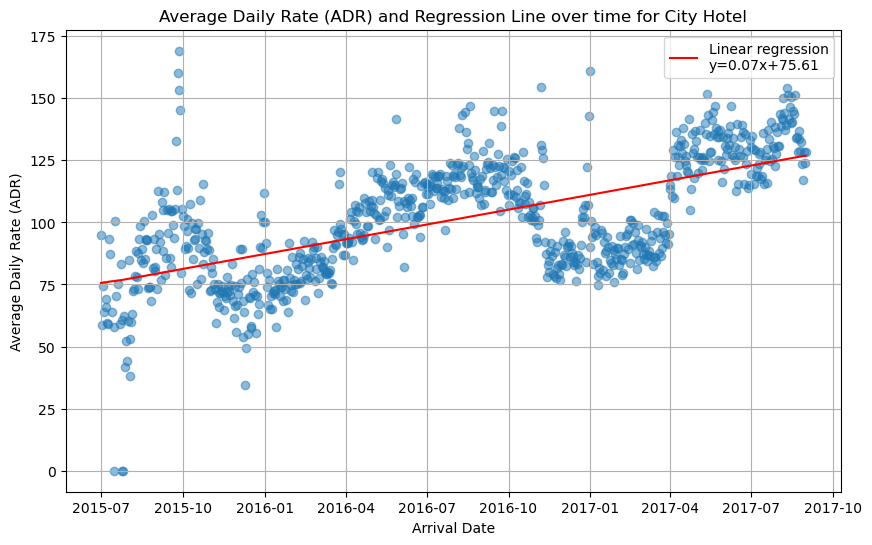

In [26]:
slope, intercept, r_value, p_value, std_err = linregress(average_adr_by_date.index, average_adr_by_date['adr'])

# Calculate the line of best fit
line = slope * average_adr_by_date.index + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_adr_by_date['arrival_date'], average_adr_by_date['adr'], alpha=0.5)

# Add the line of best fit
plt.plot(average_adr_by_date['arrival_date'], line, color='red', label=f'Linear regression\ny={slope:.2f}x+{intercept:.2f}')

# Add title and labels
plt.title('Average Daily Rate (ADR) and Regression Line over time for City Hotel')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()

# Display the r-squared value
print(f"The R-squared value is: {r_value**2:.2f}")

plt.grid(True)
plt.show()
